# Water Potability Predictive Model

## Introduction
Water is one of the most important resources for humanity. Not only is water essential for our own existance, but most of the systems and things which we rely on for survival are dependent on water as well. From hydroelectric dams which power entire cities to irrigation water for the crops and livestock which sustain us, water is essential in many facets of civilization.

Unfortunately, water can not always be counted on as being drinkable. Water can be contaminated with disease, pollutants, or both. The consuming of contaminated water can lead to serious health implications or even death. As more people enter into the developed world, being able to quickly access whether water is potable or not has the potential to save hundreds of thousands, or even millions, of lives. 

_**The objective of this project is to develop a model that will help with the assessment of questionable drinking water by identifying water sources that are non-potable. Once identified, such water sources can be avoided or hopefully even filtered/treated to be made potable.**_

## Data


_The data for this project was acquired through Kaggle, a repository for datasets on various subjects. The following infomation was provided with the dataset:_

**Content:** The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH value:** PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:** Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):** Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:** Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:** Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:** Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:** Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:** THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:** The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Methods

To solve this problem we need to create a binary classification model that can predict whether a water source is 'potable' or 'non-potable'. It is more important to correctly identify water sources that are non-potable, and so we will want to optimize for identifying true negatives throughout the modeling process. This means that 'Precision' will be the more important metric to pay attention to as I work through the project.

Generic models that will be initially tested are: 
- Random Forest Classifier
- Bagging Classifier
- Gradient Boosting Classifier
- KNeighbors Classifier
- Logistic Regression. 

After determining the 3 most effective generic models, I will use Randomized Grid Search/Grid Search to optimize the hyperparameters of those models in an effort to improve model performance.

I will then implement a Voting Classifier of the top 3 models to see if that produces a more effective model.

## Data Cleaning

Foruntately, the dataset was in relatively good condition from the start. The only major work that needed to be done was to replace NaN values. All of the datatypes were float64, which is what I expected considering they are all floating point numbers. 'Potability' is int64, since it is an integer used as a binary classifier, this makes sense.

There were three features which had NaN values: 

- ph (491 NaN values)
- Sulfate (781 NaN values)
- Trihalomethanes (162 NaN values)

In addition, 'ph' had a entry of 0, which I treated as a NaN value.

All of these values were replaced with the mean value of the respective feature. I was hesitant to remove such a large amount of data when a lot of the other feature information was still useful. 

## Exploratory Data Analysis

To visualize the data, I decided to create a Histogram and a Kernel Density Estimator for each of the features. In the Kernel Density Estimator I seperated the 'potable' and 'non-potable' water to see how the different features affected water potability.

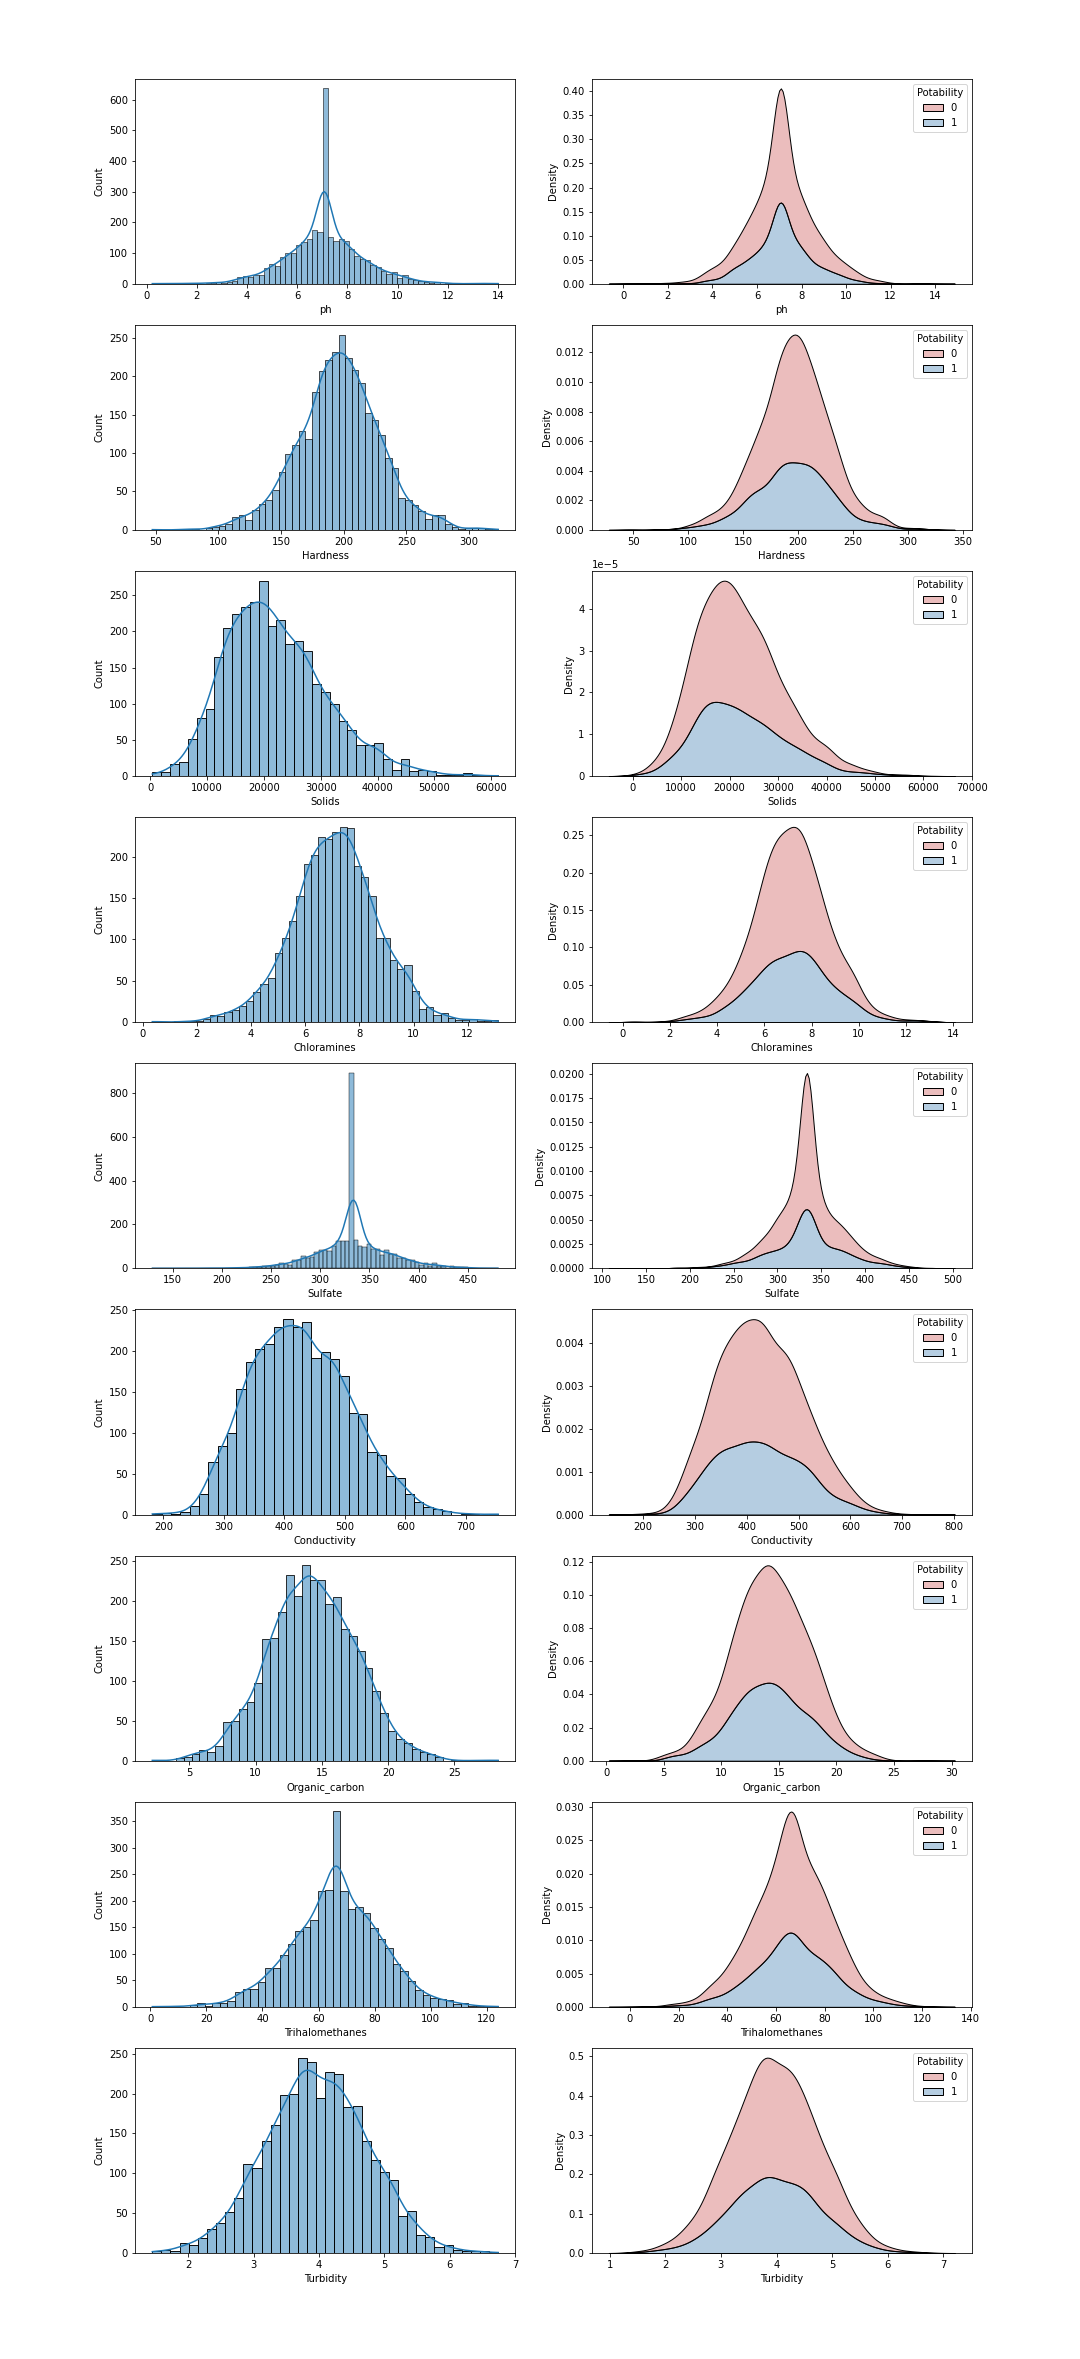

From these visualizations, we can see that most of the features follow a normal distributio